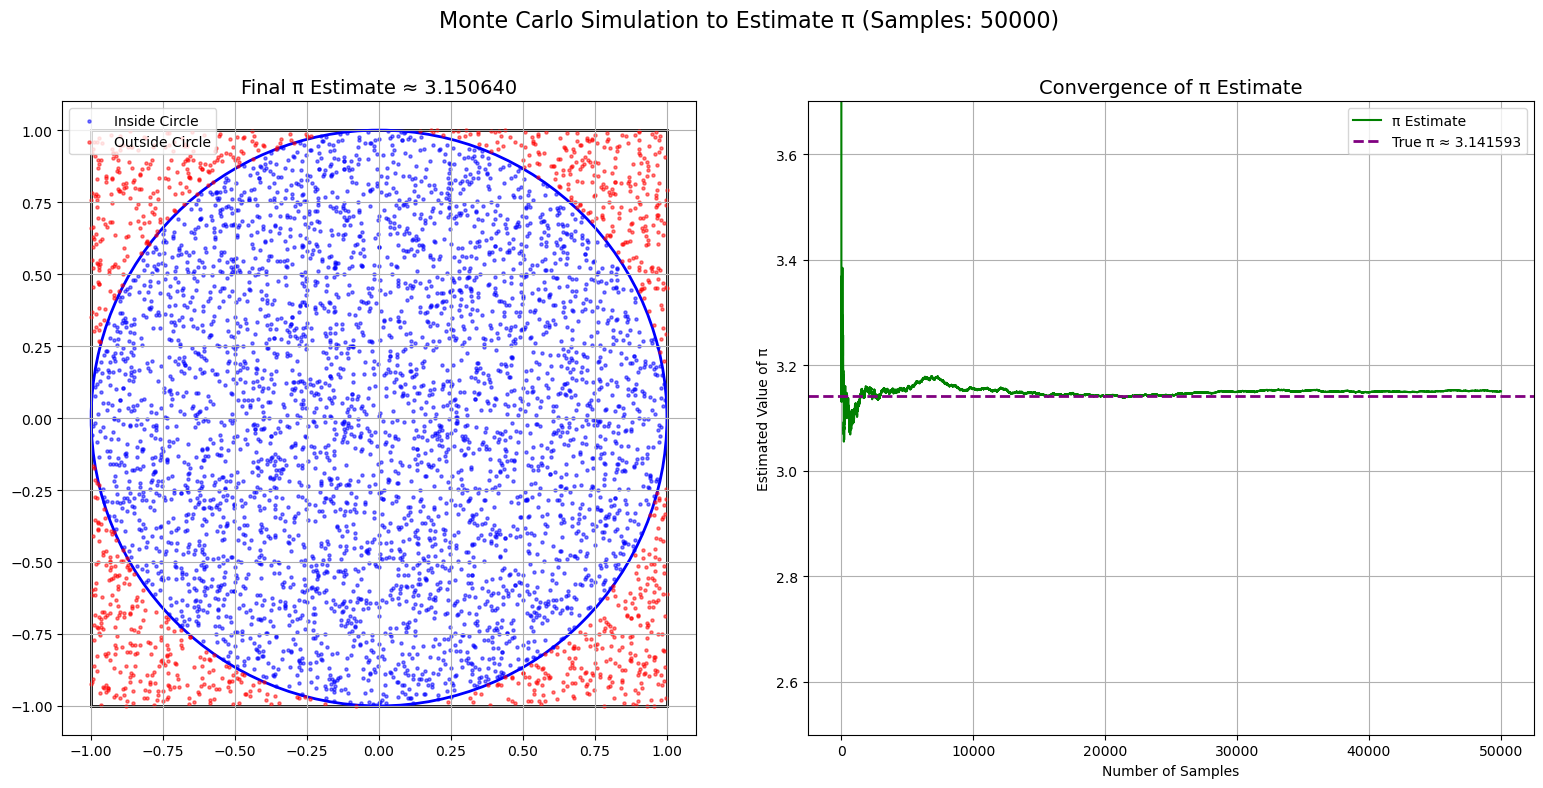

投掷飞镖总数: 50000
落在圆内的数量: 39383
π 的最终估算值: 3.15064
π 的真实值: 3.141592653589793
误差: 0.009047


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle

# --- 1. 模拟参数 ---
NUM_SAMPLES = 50000  # 投掷飞镖的总数量

# --- 2. "投飞镖"模拟 ---
# 在一个 [-1, 1] x [-1, 1] 的正方形内随机生成点
# 这个正方形的边长是2，中心在(0,0)
x = np.random.uniform(-1, 1, NUM_SAMPLES)
y = np.random.uniform(-1, 1, NUM_SAMPLES)

# 计算每个点到圆心的距离的平方 (x^2 + y^2)
# 半径为1，所以距离平方小于等于1的点就在圆内
distance_squared = x**2 + y**2
is_inside = distance_squared <= 1

# 统计落在圆内的点的数量
num_inside = np.sum(is_inside)

# --- 3. 计算 π 的估算值 ---
pi_estimate = 4 * num_inside / NUM_SAMPLES

# --- 4. 可视化 ---
# 创建一个画布，包含两个子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle(f'Monte Carlo Simulation to Estimate π (Samples: {NUM_SAMPLES})', fontsize=16)

# --- 子图1: 投掷飞镖散点图 ---
ax1.set_title(f'Final π Estimate ≈ {pi_estimate:.6f}', fontsize=14)
ax1.set_xlim(-1.1, 1.1)
ax1.set_ylim(-1.1, 1.1)
ax1.set_aspect('equal', adjustable='box')

# 绘制正方形和圆形边界
square = Rectangle((-1, -1), 2, 2, edgecolor='black', facecolor='none', lw=2)
circle = Circle((0, 0), 1, edgecolor='blue', facecolor='none', lw=2)
ax1.add_patch(square)
ax1.add_patch(circle)

# 绘制落在圆内外的点 (为了性能，只绘制部分点)
display_samples = min(NUM_SAMPLES, 5000)
x_disp, y_disp = x[:display_samples], y[:display_samples]
is_inside_disp = is_inside[:display_samples]

ax1.scatter(x_disp[is_inside_disp], y_disp[is_inside_disp], color='blue', s=5, alpha=0.5, label='Inside Circle')
ax1.scatter(x_disp[~is_inside_disp], y_disp[~is_inside_disp], color='red', s=5, alpha=0.5, label='Outside Circle')
ax1.legend()
ax1.grid(True)

# --- 子图2: π 估算值的收敛过程 ---
ax2.set_title('Convergence of π Estimate', fontsize=14)
ax2.set_xlabel('Number of Samples')
ax2.set_ylabel('Estimated Value of π')
ax2.grid(True)

# 计算历史估算值
# np.cumsum(is_inside) 快速计算累积命中数
cumulative_inside = np.cumsum(is_inside)
sample_counts = np.arange(1, NUM_SAMPLES + 1)
pi_estimates_history = 4 * cumulative_inside / sample_counts

ax2.plot(sample_counts, pi_estimates_history, color='green', lw=1.5, label='π Estimate')
ax2.axhline(y=np.pi, color='purple', linestyle='--', lw=2, label=f'True π ≈ {np.pi:.6f}')
ax2.set_ylim(2.5, 3.7) # 设置一个合理的y轴范围
ax2.legend()


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print(f"投掷飞镖总数: {NUM_SAMPLES}")
print(f"落在圆内的数量: {num_inside}")
print(f"π 的最终估算值: {pi_estimate}")
print(f"π 的真实值: {np.pi}")
print(f"误差: {abs(pi_estimate - np.pi):.6f}")